## In this activity, our objective is to calculate the Bulk-Modulus of FCC-Cu using different XC-functionals. 

We will start with a FCC-conventional unitcell of Copper consisting of four atoms in the unitcell. 

#### Simulation Parameters: 
- SCF Convergence Threshold: 0.01 meV.
- All other parameters should be decided by teams as per convergence requirement of 2 meV/atom. 
- XC functionals to be tested: `PBE` and `LDA`

Tasks:
- [Generate Unitcell](#generate_unitcell)
- [PBE-kgrid Convergence](#pbe_kgrid)
- [PBE-encut Convergence](#pbe_encut)
- [PBE-sigma Convergence](#pbe_sigma)
- [PBE Energies vs alat](#pbe_alat)
- [PBE Bulk Modulus](#pbe_modulus)
- [LDA-kgrid Convergence](#lda_kgrid)
- [LDA-encut Convergence](#lda_encut)
- [LDA-sigma Convergence](#lda_sigma)
- [LDA Energies vs alat](#lda_alat)
- [LDA Bulk Modulus](#lda_modulus)



In [47]:
!/opt/pbs/bin/qstat 

In [48]:
alias qstat /opt/pbs/bin/qstat 

In [49]:
qstat

In [11]:
# load all required modules

import os, sys
import ase
import ase.calculators.vasp
import ase.io 
import ase.units
import ase.eos
import ase.visualize
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import mywrapper

import ase.build
import ase.visualize
import matplotlib.pyplot as plt

<a id='generate_unitcell'></a>
### Generate Unitcell

In [18]:
# Write a function to generate Cu FCC-unitcell with a given lattice constant
def generate_unitcell(a):
    '''
    Given a lattice constant (a), generate a conventioanl FCC unitcell of Cu
    '''
    # write your code here
    atoms = ase.build.bulk('Cu', 'fcc', a, cubic=True)
    
    return atoms

In [20]:
atoms=generate_unitcell(3.6)

ase.visualize.view(atoms)

In [50]:
qstat

#### For all convergence studies, use lattice-constant value of 3.6 Angstrom, Encut of 350 eV, K-grid of $8\times8\times8$ and sigma 0.05 eV.

## PBE Calculations first

<a id='pbe_kgrid'></a>
### PBE-Kgrid Convergence

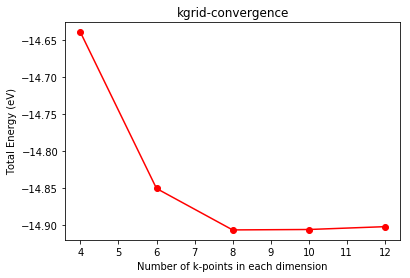

kpt | dE (meV/atom) | if converged?
----------------------------------------
  4          65.647     0
  6          12.898     0
  8           1.096     1
 10           0.956     1
 12           0.000     1


In [24]:
XC = 'PBE'
encut = 350
sigma = 0.05
alat = 3.6

kpts = [4,6,8,10,12]
energies = []

for kpt in kpts:
    path = "%s/kgrid/%d" % (XC, kpt)
    
    # write your code here
    calc = ase.calculators.vasp.Vasp(
            xc="pbe",
            kpts=[kpt,kpt,kpt],
            encut=400,
            ediff=1e-5,
            ismear=0,
            sigma=0.05,
            lwave=False, 
            )
    
    atoms.set_calculator(calc)
    energy = mywrapper.get_energy(atoms, dir=path)
    energies.append(energy)
    
plt.figure(0)
plt.plot(kpts, energies, 'ro-')
plt.xlabel('Number of k-points in each dimension')
plt.ylabel('Total Energy (eV)')
plt.title('kgrid-convergence')
plt.show()

# convert energies to meV/atom
natom = len(atoms.get_positions())
energies = abs(1000*(np.array(energies) - energies[-1])/natom)
print("kpt | dE (meV/atom) | if converged?")
print('-'*40)
for kpt,e in zip(kpts, energies):
    print('%3d %15.3f %5d' % (kpt, e, e<2))    

In [25]:
qstat

<a id='pbe_encut'></a>
### PBE-Encut Convergence

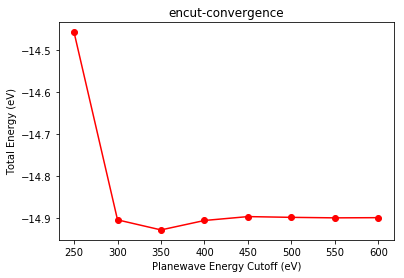

encut (eV) | dE (meV/atom) | if converged?
----------------------------------------
      250         110.655     0
      300           1.305     1
      350           7.309     0
      400           1.679     1
      450           0.639     1
      500           0.190     1
      550           0.108     1
      600           0.000     1


In [36]:
XC = 'PBE'

sigma = 0.05
alat = 3.6

encuts = [250,300,350,400,450,500,550,600]
energies = []

for encut in encuts:
    
    # dir-name for this encut calculation
    path = 'encut/%d' % (encut)
    
    # set basic calculator
    calc = ase.calculators.vasp.Vasp(
            xc="pbe",
            kpts=[8,8,8],
            encut=encut,
            ediff=1e-5,
            ismear=0,
            sigma=0.05,
            lwave=False,            
            )
    
    atoms.set_calculator(calc)
    energy = mywrapper.get_energy(atoms, dir=path)
    energies.append(energy)
    
    
plt.figure(1)
plt.plot(encuts, energies, 'ro-')
plt.xlabel('Planewave Energy Cutoff (eV)')
plt.ylabel('Total Energy (eV)')
plt.title('encut-convergence')
plt.show()
# convert energies to meV/atom
natom = len(atoms.get_positions())
energies = abs(1000*(np.array(energies) - energies[-1])/natom)
print("encut (eV) | dE (meV/atom) | if converged?")
print('-'*40)
for encut,e in zip(encuts, energies):
    print('%9d %15.3f %5d' % (encut, e, e<2))


encut (eV) | dE (meV/atom) | if converged?
----------------------------------------
      250         110.655     0
      300           1.305     1
      350           7.309     0
      400           1.679     1
      450           0.639     1
      500           0.190     1
      550           0.108     1
      600           0.000     1


<a id='pbe_sigma'></a>
### PBE-Sigma Convergence

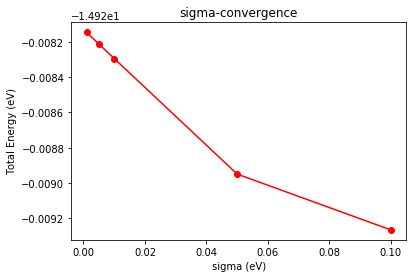

sigma (eV) | dE (meV/atom) | if converged?
----------------------------------------
    0.100           0.280     1
    0.050           0.201     1
    0.010           0.037     1
    0.005           0.017     1
    0.001           0.000     1


In [38]:
XC = 'PBE'

 
sigma = 0.05
alat = 3.6

sigmas = [0.100, 0.050, 0.010, 0.005, 0.001]
energies = []

# write your code here
for sigma in sigmas:
    
    # dir-name for this kpt calculation
    path = 'sigma/%d' % (int(1000*sigma))
    
    # set basic calculator
    calc = ase.calculators.vasp.Vasp(
            xc="pbe",
            kpts=[8,8,8],
            encut=350,
            ediff=1e-5,
            ismear=0,
            sigma=sigma,
            lwave=False,            
            )
    
    atoms.set_calculator(calc)
    energy = mywrapper.get_energy(atoms, dir=path)
    energies.append(energy)
    
plt.figure(2)
plt.plot(sigmas, energies, 'ro-')
plt.xlabel('sigma (eV)')
plt.ylabel('Total Energy (eV)')
plt.title('sigma-convergence')
plt.show()    

# convert energies to meV/atom
natom = len(atoms.get_positions())
energies = abs(1000* (np.array(energies) - energies[-1])/natom)
print("sigma (eV) | dE (meV/atom) | if converged?")
print('-'*40)
for sigma,e in zip(sigmas, energies):
    print('%9.3f %15.3f %5d' % (sigma, e, e<2))

<a id='pbe_alat'></a>
### PBE: Relax the structure: Calculate energies for different lattice constants

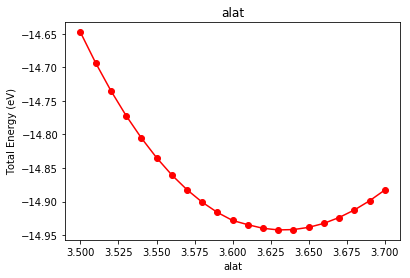

In [66]:
XC = 'PBE'
kpt = [8,8,8]
encut = 350
sigma = .010

alats = [3.6 + x/100.0 for x in range(-10,11)]
energies = [] 

for a in alats:
    
    
    atoms = generate_unitcell(a)
    
    
    # dir-name for this kpt calculation
    path = 'alat3/%d' % (int(1000*a))
    
    # set basic calculator
    calc = ase.calculators.vasp.Vasp(
            xc="pbe",
            kpts=kpt,
            encut=350,
            ediff=1e-5,
            ismear=0,
            sigma=sigma,
            lwave=False,            
            )
    
    atoms.set_calculator(calc)
    energy = mywrapper.get_energy(atoms, dir=path)
    energies.append(energy)
    
plt.figure(2)
plt.plot(alats, energies, 'ro-')
plt.xlabel('alat')
plt.ylabel('Total Energy (eV)')
plt.title('alat')
plt.show()    
# write your code here

<a id='pbe_modulus'></a>
### PBE: Use Energy vs alat to calculate the Bulk Modulus
Use [`ase.eos.EquationOfState`](https://wiki.fysik.dtu.dk/ase/tutorials/eos/eos.html) to fit calculated `volumes` (from `alats`) and `energies` and finally to calculate the Bulk Modulus

In [ ]:
z= np.polyfit(volume, energies, 3)

p = np.poly1d(z)  # p is polynomial


In [78]:
alats = np.array(alats)

vol = []
for i in alats:
    vol.append(i**3 *(1e-30))
z= np.polyfit(vol, energies, 3)
p = np.poly1d(z) 
print(p)

a = np.polyder(p)
a_a = np.polyder(a)
print(a_a)

index = np.argmin(energies)
relaxed_vol = vol[index]

bulk_bulk = a_a(relaxed_vol)
print(bulk_bulk*relaxed_vol)
bulk_modulus = relaxed_vol * bulk_bulk
print("bulk_modulus  ", bulk_modulus * 1e-9)



           3             2
-4.74e+86 x + 7.737e+58 x - 4.149e+30 x + 58.39
 
-2.844e+87 x + 1.547e+59
8.943735365251177e+29
bulk_modulus   8.943735365251177e+20


In [ ]:
# write your code here
print("XC: %s | relaxed-alat: %5.3f (A) | Bulk-modulus: %5.3f GPa" % (XC, a0, B/ase.units.GPa))

# Repeat the process for LDA

<a id='lda_kgrid'></a>
### LDA: Kgrid

In [ ]:
XC = 'LDA'
encut = 350
sigma = 0.05
alat = 3.6

kpts = [4,6,8,10,12]
energies = []

# write your code here

<a id='lda_encut'></a>
### LDA-Encut Convergence

In [ ]:
XC = 'LDA'
kpt = 
sigma = 0.05
alat = 3.6

encuts = [250,300,350,400,450,500,550,600]
energies = []

# write your code here

<a id='lda_sigma'></a>
### LDA-sigma convergence

In [ ]:
XC = 'LDA'
kpt = 
encut = 
sigma = 0.05
alat = 3.6

sigmas = [0.100, 0.050, 0.010, 0.005, 0.001]
energies = []

# write your code here

<a id='lda_alat'></a>
### LDA: Energies vs alat

In [ ]:
XC = 'LDA'
kpt = 
encut = 
sigma = 

alats = [3.5 + x/100.0 for x in range(-10,11)]
energies = [] 
# write your code here

<a id='lda_modulus'></a>
### LDA: Bulk Modulus

In [ ]:
# write your code here
print("XC: %s | alat: %5.3f (A) | Bulk-modulus: %5.3f GPa" % (XC, a0, B/ase.units.GPa))

In [ ]:
!/opt/pbs/bin/qstat 